[PIL ImageDraw (rectangle)](https://pillow.readthedocs.io/en/5.1.x/reference/ImageDraw.html) <br>

In [7]:
%matplotlib inline

import IPython.display as ip_display
import os
import sys
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import skimage
from skimage.filters import threshold_otsu

import openslide

import PIL
from PIL.Image import Image

import sys
sys.path.insert(0, '../src/python')
from openslide_2_tfrecord_module import svs_file_to_patches_tfrecord, get_iterable_tfrecord


file_ext_list = ['.svs', '.tif', '.tiff']
def get_file_size_dict(data_dir, reverse_dict=False):
    """ Usage:
    file_size_dict = get_file_size_dict(data_dir)
    """
    file_size_dict = {}
    for f in os.listdir(data_dir):
        ff = os.path.join(data_dir, f)
        if os.path.isfile(ff): 
            _, f_ext = os.path.splitext(ff)
            if f_ext in file_ext_list:
                file_size_dict[ff] = os.path.getsize(ff)
                
    return file_size_dict


data_dir = '../../DigiPath_MLTK_data/Aperio'

file_size_dict = get_file_size_dict(data_dir)
rev_file_size_dict = {v:k for k, v in file_size_dict.items()}

ordered_keys = sorted(list(file_size_dict.values()))
files_list = []
for k in ordered_keys:
    files_list.append(rev_file_size_dict[k])

print('\nordered by size:\n')
count = 0
for f in files_list:
    _, f_only = os.path.split(f)
    print('%3i %30s: %i'%(count, f_only, file_size_dict[f]))
    count += 1


ordered by size:

  0         CMU-1-Small-Region.svs: 1938955
  1               JP2K-33003-1.svs: 63847265
  2           CMU-1-JP2K-33005.svs: 132565343
  3                      CMU-1.svs: 177552579
  4                      CMU-3.svs: 253815723
  5               JP2K-33003-2.svs: 289250433
  6                      CMU-2.svs: 390750635


Opening Image file: 
	../../DigiPath_MLTK_data/Aperio/JP2K-33003-1.svs

openslide.OpenSlide(test_file_name) is type: <class 'openslide.OpenSlide'>
obj.level_count 3
obj.dimensions (15374, 17497)
obj.level_dimensions ((15374, 17497), (3843, 4374), (1921, 2187))
obj.level_downsamples (1.0, 4.000374525217675, 8.001790310306966)
obj.properties are type <class 'openslide._PropertyMap'>

obj.associated_images <_AssociatedImageMap {'label': <PIL.Image.Image image mode=RGBA size=415x422 at 0x148A65EB8>, 'macro': <PIL.Image.Image image mode=RGBA size=1280x421 at 0x148A65F60>, 'thumbnail': <PIL.Image.Image image mode=RGBA size=674x768 at 0x148A860B8>}> <class 'openslide._AssociatedImageMap'>

obj.read_region <PIL.Image.Image image mode=RGBA size=200x200 at 0x148A65F98>

obj.get_best_level_for_downsample(8.001790) 2

Fillable property names
	PROPERTY_NAME_COMMENT
	PROPERTY_NAME_MPP_X
	PROPERTY_NAME_MPP_Y
	PROPERTY_NAME_OBJECTIVE_POWER
Slide thumbnail <class 'PIL.Image.Image'>


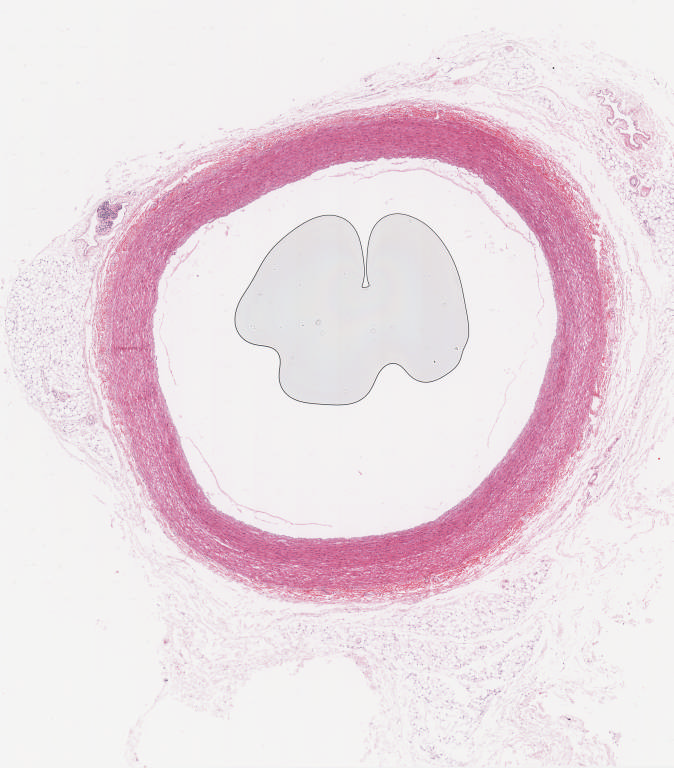


openslide_obj.close() returns: None
cell run time: 0.372


In [8]:
cell_start_time = time.time()

test_file_name = os.path.join(data_dir, 'JP2K-33003-1.svs')
print('Opening Image file: \n\t{}\n'.format(test_file_name))
openslide_obj = openslide.OpenSlide(test_file_name)

print('openslide.OpenSlide(test_file_name) is type:', type(openslide_obj))
print('obj.level_count', openslide_obj.level_count)
print('obj.dimensions', openslide_obj.dimensions)
print('obj.level_dimensions', openslide_obj.level_dimensions)
print('obj.level_downsamples', openslide_obj.level_downsamples)
print('obj.properties are type', type(openslide_obj.properties))

print('\nobj.associated_images', openslide_obj.associated_images, type(openslide_obj.associated_images))

blind_region = openslide_obj.read_region((0, 0), 0, (200,200))
print('\nobj.read_region', openslide_obj.read_region((0, 0), 0, (200,200)))

scldwn = openslide_obj.level_downsamples[-1]
print('\nobj.get_best_level_for_downsample(%0.6f)'%(scldwn), 
      openslide_obj.get_best_level_for_downsample(scldwn))

print('\nFillable property names\n\t{}\n\t{}\n\t{}\n\t{}'.format('PROPERTY_NAME_COMMENT',
                                                                 'PROPERTY_NAME_MPP_X', 
                                                                 'PROPERTY_NAME_MPP_Y', 
                                                                 'PROPERTY_NAME_OBJECTIVE_POWER'))
# label = openslide_obj.associated_images['label']
# macro = openslide_obj.associated_images['macro']
thumbnail = openslide_obj.associated_images['thumbnail']
# print('Slide Label')
# display(label)
print('Slide thumbnail', type(thumbnail))
display(thumbnail)

print('\nopenslide_obj.close() returns:', openslide_obj.close())
print('cell run time: %0.3f'%(time.time() - cell_start_time))

[StackOverflow draw rectangle](https://stackoverflow.com/questions/41405632/draw-a-rectangle-and-a-text-in-it-using-pil) <br>

```python
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

source_img = Image.open(file_name).convert("RGBA")

draw = ImageDraw.Draw(source_img)
draw.rectangle(((0, 0), (100, 100)), fill="black")
draw.text((20, 70), "something123", font=ImageFont.truetype("font_path123")) # font truetype ?? DNE

source_img.save(out_file, "JPEG")
```
[StackOverflow composite](https://stackoverflow.com/questions/2563822/how-do-you-composite-an-image-onto-another-image-with-pil-in-python) <br>
```python
from PIL import Image
img = Image.open('/path/to/file', 'r')
img_w, img_h = img.size
background = Image.new('RGBA', (1440, 900), (255, 255, 255, 255))
bg_w, bg_h = background.size
offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)
background.paste(img, offset)
background.save('out.png')
```

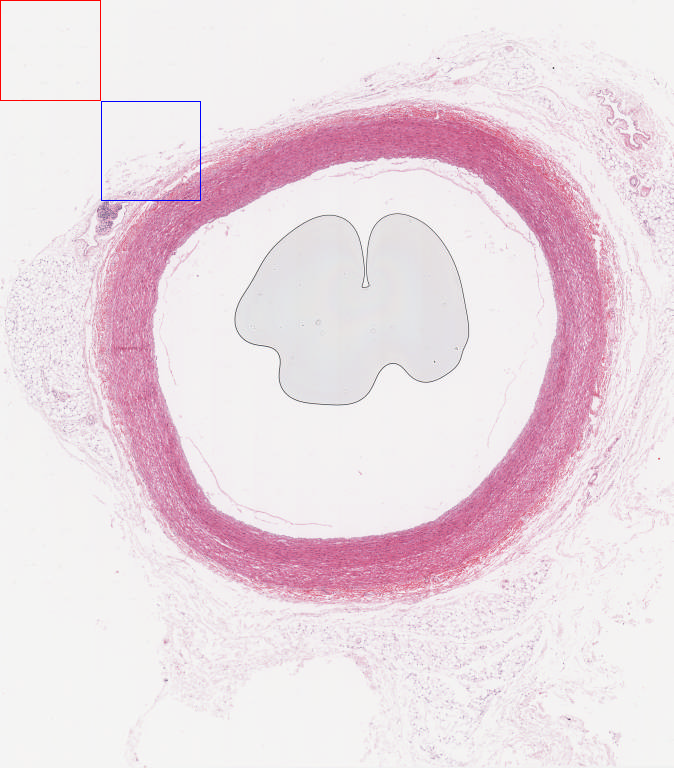

In [39]:
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

mtim = thumbnail.convert('RGBA')
draw = ImageDraw.Draw(mtim)
draw.rectangle(((0, 0), (100, 100)), outline='red', fill=None)
draw.rectangle(((101, 101), (200, 200)), outline='blue', fill=None)
# draw.text((20, 70), "something123", font=ImageFont.truetype("font_path123"))
display(mtim)

In [32]:
# %load ../src/python/openslide_2_tfrecord_module.py
"""

"""
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import os
from tempfile import TemporaryDirectory

import numpy as np
import openslide
from skimage.filters import threshold_otsu
import PIL

WORKING_THUMB_MAX_SIZE = [2048, 2048]
WORKING_THUMB_MIN_SIZE = [1024, 1024]

"""                                                                     <<
some code from tensorflow examples page:
https://www.tensorflow.org/tutorials/load_data/tf_records
https://www.tensorflow.org/api_docs/python/tf/data/TFRecordDataset
"""
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))


def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def image_example(image_string, label, image_name='patch'):
    """ image_metadat_dict = image_example(image_string, label, image_name)
    Create a dictionary of jpg image features
    Args:
        image_string:  bytes(PIL_image)
        label:         a number
        image_name:    bytes(image_name)
    Returns:
        one_tf_train_example: tf.train.Example 
    """
    image_shape = tf.image.decode_jpeg(image_string).shape

    feature = {'height': _int64_feature(image_shape[0]),
               'width': _int64_feature(image_shape[1]),
               'depth': _int64_feature(image_shape[2]),
               'label': _int64_feature(label), 
               'image_name': _bytes_feature(image_name),
               'image_raw': _bytes_feature(image_string) }

    return tf.train.Example(features=tf.train.Features(feature=feature))


def _parse_image_function(example_proto):
    """ reader for image_example() encoded as tfrecord file 
        usage:
    parsed_image_dataset = tf.data.TFRecordDataset(tfrecord_name).map(_parse_image_function)
    
    Args: 
        example_proto:
        
    Returns:
        iterable_tfrecord:   try iterable_tfrecord.__iter__()
    """
    image_feature_description = {
        'height': tf.io.FixedLenFeature([], tf.int64),
        'width': tf.io.FixedLenFeature([], tf.int64),
        'depth': tf.io.FixedLenFeature([], tf.int64),
        'label': tf.io.FixedLenFeature([], tf.int64),
        'image_name': tf.io.FixedLenFeature([], tf.string),
        'image_raw': tf.io.FixedLenFeature([], tf.string) }

    return tf.io.parse_single_example(example_proto, image_feature_description)


def get_iterable_tfrecord(tfr_name):
    """ usage:
    iterable_tfrecord = get_iterable_tfrecord(tfr_name)
    
    Args:
        tfr_name:   tensorflow data TFRecord file
        
    Returns:
        TFRecordDataset_map_object:  tf.data.TFRecordDataset().map()
        
    """
    return tf.data.TFRecordDataset(tfr_name).map(_parse_image_function)
    

def get_adjcent_segmented_length_fence_array(segment_length, length):
    """ Usage:
    fences = get_adjcent_segmented_length_fence_array(segment_length, length)
    
    Args:
        segment_length: patch size - number of pixels high or wide 
        length:         overall number of pixels high or wide 
        
    Returns:
        fences:         n x 2 array for [top, bottom] or [height, width] usage
                        Note that images are numbered from top to bottom
    """
    fences = {}
    n_fenced = length // segment_length
    n_remain = 1 + length % segment_length
    paddit = n_remain // 2
    if n_remain == segment_length:
        paddit = 0
        n_remain = 0
        n_fenced = n_fenced + 1
    
    fence_array = np.zeros((n_fenced, 2)).astype(int)
    for k in range(n_fenced):
        if k == 0:
            fence_array[k, 0] = paddit
            fence_array[k, 1] = fence_array[k, 0] + segment_length - 1
        elif fence_array[k-1, 1] + segment_length <= length:
            fence_array[k, 0] = fence_array[k-1, 1] + 1
            fence_array[k, 1] = fence_array[k, 0] + segment_length - 1
        
    fences['fence_array'] = fence_array
    fences['n_fenced'] = n_fenced
    fences['n_remain'] = n_remain
    fences['padding'] = paddit

    return fences

        
def get_patch_name_from_row_col(row, col, base_name='patch', file_ext='.jpg'):
    """ Usage:
    patch_name = get_patch_name_from_row_col(row,col,base_name='patch',file_ext='.jpg') 
    
    Args:
        row, col:       integer list e.g row = [0, 20]
        base_name:      beginning of the file name
        file_ext:       default is '.jpg' Note: include the period before the name
        
    Returns:
        patch_name:     file name (without directory path)
    """
    if file_ext[0] != '.':
        file_ext = '.' + file_ext
    patch_name = base_name + '_row_%i_%i'%(row[0], row[1])
    patch_name += '_col_%i_%i%s'%(col[0], col[1], file_ext)
    
    return patch_name


def get_row_col_from_patch_name(fname):
    """ Usage:
    row_col_dict = get_row_col_from_filename(fname) 
    
    Args:
        fname:          file name as created by this module function:
                        get_patch_name_from_row_col(row, col, base_name, file_ext)
    Returns:
        row_col_dict: { 'base_name': parts_list[0], 
                        'file_ext': file_ext, 
                        'row': row, 
                        'col': col }
    """
    row_label = 'row'
    col_label = 'col'
    r = []
    c = []
    base_name, file_ext = os.path.splitext(os.path.split(fname)[1])
    parts_list = base_name.split('_')
    
    for i in range(len(parts_list)):
        if parts_list[i] == row_label:
            r.append(parts_list[i+1])
            r.append(parts_list[i+2])
        elif parts_list[i] == col_label:
            c.append(parts_list[i+1])
            c.append(parts_list[i+2])
    row = np.array(r).astype(np.int)
    col = np.array(c).astype(np.int)
    
    return {'base_name': parts_list[0], 'file_ext': file_ext, 'row': row, 'col': col }


def get_mask_w_scale_grid(os_obj, patch_height, patch_width):
    """ Usage:
    mask_dict = get_mask_w_scale_grid(svs_file_name, patch_height, patch_width)
    
    Args:
        os_obj:         file name or opened OpenSlide object
        patch_height:   how high to make the patch indices
        patch_width:    how wide to make the patch indices
    
    Returns:
        mask_dict:      {'thumb_mask': mask_im, 
                         'full_scale_rows_dict': full_scale_rows_dict, 
                         'full_scale_cols_dict': full_scale_cols_dict, 
                         'full_scale_rows_arrays': full_scale_rows_arrays, 
                         'full_scale_cols_arrays': full_scale_cols_arrays,
                         'thumb_scale_rows_arrays': thumb_scale_rows_arrays, 
                         'thumb_scale_cols_arrays': thumb_scale_cols_arrays }
    """
    close_os_obj = False
    if isinstance(os_obj, str) and os.path.isfile(os_obj):
        os_obj = openslide.OpenSlide(svs_file_name)
        close_os_obj = True
    
    #                               get the indexing arrays for the full size grid
    pixels_height = os_obj.dimensions[0]
    pixels_width = os_obj.dimensions[1]

    full_scale_rows_dict = get_adjcent_segmented_length_fence_array(segment_length=patch_height, 
                                                                    length=pixels_height)
    full_scale_cols_dict = get_adjcent_segmented_length_fence_array(segment_length=patch_width, 
                                                                    length=pixels_width)
    full_scale_rows_arrays = full_scale_rows_dict['fence_array']
    full_scale_cols_arrays = full_scale_cols_dict['fence_array']
    
    #                               determine thumbnail size & get the mask
    pixels_height_ds = os_obj.level_dimensions[-1][0]
    pixels_width_ds = os_obj.level_dimensions[-1][1]
    
    thumbnail_divisor = 1
    while_stopper = 20
    count = 0
    
    scale_determinant = max(pixels_height_ds, pixels_width_ds)
    while scale_determinant // thumbnail_divisor > WORKING_THUMB_MAX_SIZE[0] and count < while_stopper:
        count += 0
        thumbnail_divisor *= 2
    
    thumb_height = pixels_height_ds // thumbnail_divisor
    thumb_width = pixels_width_ds // thumbnail_divisor
    
    #                               get the indexing arrays for the thumbnail sized grid
    rows_divisor = pixels_height / thumb_height
    thumb_scale_rows_arrays = (full_scale_rows_arrays // rows_divisor).astype(int)
    cols_divisor = pixels_width / thumb_width
    thumb_scale_cols_arrays = (full_scale_cols_arrays // cols_divisor).astype(int)

    #                               git the mask image
    one_thumb = os_obj.get_thumbnail((thumb_height, thumb_width))
    grey_thumbnail = np.array(one_thumb.convert('L'))
    thresh = threshold_otsu(grey_thumbnail)
    mask = np.array(grey_thumbnail) < thresh
    mask_im = PIL.Image.fromarray(np.uint8(mask) * 255)

    if close_os_obj == True:
        os_obj.close()
        
    mask_dict = {'one_thumb': one_thumb, 
                 'thumb_mask': mask_im, 
                 'full_scale_rows_dict': full_scale_rows_dict, 
                 'full_scale_cols_dict': full_scale_cols_dict, 
                 'full_scale_rows_arrays': full_scale_rows_arrays, 
                 'full_scale_cols_arrays': full_scale_cols_arrays,
                 'thumb_scale_rows_arrays': thumb_scale_rows_arrays, 
                 'thumb_scale_cols_arrays': thumb_scale_cols_arrays}
    
    return mask_dict

def svs_file_to_patches_tfrecord(svs_file_name, output_dir, patch_size, drop_threshold, file_ext=None):
    """ Usage:
    report_dict = svs_file_to_patches_tfrecord(svs_file_name, output_dir, patch_size, drop_threshold, file_ext)
    
    Args:
        svs_file_name:   accessable path file name
        output_dir:      writeable directory for the tfrecord
        patch_size:      list of 2 integers: [224, 224] or an integer if square
        drop_threshold:  number between 0 & 1 -- if the masked area of the patch is smaller it is included
        file_ext:        default is '.jpg' ('.png') was tested (Note the period is included)
        
    Returns:
        svs_file_conversion_dict:  {'mask_dict': mask_dict, 
                                    'tfrecord_file_name': tfrecord_file_name, 
                                    'number_of_patches': seq_number, 
                                    'temp_dir': temp_dir }
    """
    
    # construct file nameing variables from svs_file_name, output_dir, set file_ext if missing
    _, file_name_base = os.path.split(svs_file_name)
    file_name_base, _ = os.path.splitext(file_name_base)
    tfrecord_file_name = file_name_base + '.tfrecords'
    tfrecord_file_name = os.path.join(output_dir, tfrecord_file_name)
    if file_ext is None:
        file_ext = '.jpg'
        
    # expand patch size into both height and width
    if isinstance(patch_size, list) and len(patch_size) == 2:
        patch_height = patch_size[0]
        patch_width = patch_size[1]
    else:
        patch_height = patch_width = patch_size
    
    # get the OpenSlide object - open the file, and get the mask with the scaled grids
    os_obj = openslide.OpenSlide(svs_file_name)
    mask_dict = get_mask_w_scale_grid(os_obj, patch_height, patch_width)
    
    # convert the dictionary to named variables for clarity
    mask_im = mask_dict['thumb_mask']
    full_scale_rows_arrays = mask_dict['full_scale_rows_arrays']
    full_scale_cols_arrays = mask_dict['full_scale_cols_arrays']
    thumb_scale_rows_arrays = mask_dict['thumb_scale_rows_arrays']
    thumb_scale_cols_arrays = mask_dict['thumb_scale_cols_arrays']
    
    seq_number = 0
    # open a temporary directory and a TFRecordWriter object
    with TemporaryDirectory() as temp_dir:
        with tf.io.TFRecordWriter(tfrecord_file_name) as writer:
            
            # iterate through the rows and columns of patches
            for row in range(full_scale_rows_arrays.shape[0]):
                for col in range(full_scale_cols_arrays.shape[0]):
                    # get the small segment of the mask with PIL ordering for crop
                    r = thumb_scale_rows_arrays[row]
                    c = thumb_scale_cols_arrays[col]
                    area = (c[0], r[0], c[1], r[1])
                    thumb_segment = mask_im.crop(area)
                    thumb_arr = np.array(thumb_segment)
                    
                    # evaluate the thumb_segment - reject if the masked (dark area) is too large
                    mask_value = np.float(np.sum(thumb_arr==0)) / np.float(np.prod(thumb_arr.shape))
                    if mask_value <= drop_threshold:
                        # put row=(top, bottom) & column=(left, right) fence arrays into PIL format
                        fs_row = full_scale_rows_arrays[row]
                        fs_col = full_scale_cols_arrays[col]
                        read_location = (full_scale_cols_arrays[col][0], full_scale_rows_arrays[row][0])
                        
                        # build the full-path patch name in the temp dir
                        patch_name = get_patch_name_from_row_col(fs_row, fs_col, file_name_base, file_ext)
                        patch_full_name = os.path.join(temp_dir, patch_name)

                        # let OpenSlide extract the (PIL) patch, convert to RGB & save temporary
                        full_sect = os_obj.read_region(level=0, size=patch_size, location=read_location)
                        full_sect = full_sect.convert('RGB')                                                
                        full_sect.save(patch_full_name)
                        
                        # add the file to the tfrecord
                        image_string = open(patch_full_name, 'rb').read()
                        tf_example_obj = image_example(image_string, 
                                                       label=seq_number, 
                                                       image_name=bytes(patch_name,'utf8'))
                        
                        writer.write(tf_example_obj.SerializeToString())
                        seq_number += 1

    # prototype a return report - what is really needed?
    svs_file_conversion_dict = {'mask_dict': mask_dict, 
                                'tfrecord_file_name': tfrecord_file_name, 
                                'number_of_patches': seq_number, 
                                'temp_dir': temp_dir}
    
    return svs_file_conversion_dict




In [36]:
"""
                Givin a WSI and a TFRecord generate a masked thumbnail
                      gray background - patches not included
                      color_forground - patches included
                      black border    - patch boundry -- info not saved in previous version
"""
def generate_masked_thumbnail(tfrecord_filename, wsi_filename):
    """  """
    masked_thumbnail = None
    patch_height = 224
    patch_width = 224
    # open the TFRecord - get the iterator
    #       find the patch size from the image names
    #       
    # open the WSI - get FSI size & get thumbnail, make a grayscale copy as "RGBA" & calculate scale
    os_obj = openslide.OpenSlide(wsi_filename)
    mask_dict = get_mask_w_scale_grid(os_obj, patch_height, patch_width)
    
    one_thumb = mskdct['one_thumb']
    grey_thumb = one_thumb.convert('L')
    grey_thumb = grey_thumb.convert('RGB')

    
    # for each patch 
    #   get the location 
    #   get the scaled thumb location
    #   copy the color thumb location into the grayscale
    # return converted RGBA grayscale as RGB
    
    return mask_dict

tfrecord_filename = 'bobo'
test_file_name = os.path.join(data_dir, 'JP2K-33003-1.svs')

mskdct = generate_masked_thumbnail(tfrecord_filename, test_file_name)
one_thumb = mskdct['one_thumb']
grey_thumb = one_thumb.convert('L')
grey_thumb = grey_thumb.convert('RGBA')
for k in mskdct.keys():
    print(k)

one_thumb
thumb_mask
full_scale_rows_dict
full_scale_cols_dict
full_scale_rows_arrays
full_scale_cols_arrays
thumb_scale_rows_arrays
thumb_scale_cols_arrays


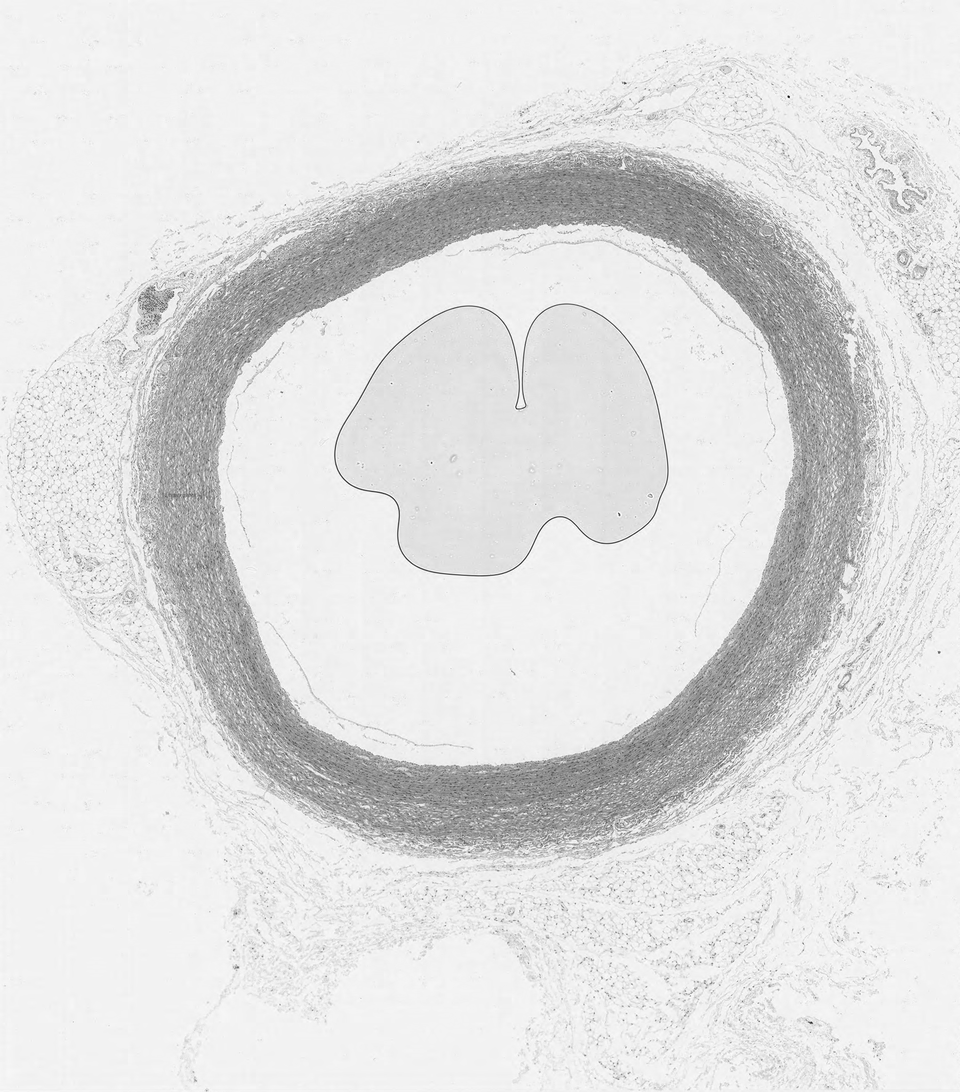

In [37]:
display(grey_thumb)